Copyright 2023 Genentech, Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
from efaar_benchmarking.data_loading import load_replogle
from efaar_benchmarking.efaar import embed_by_scvi, embed_by_pca, align_by_centering, aggregate_by_mean
from efaar_benchmarking.benchmarking import benchmark
from efaar_benchmarking.plotting import plot_recall
import pandas as pd
import numpy as np

recall_threshold_pairs = []
start = 0.01
end = 0.99
step = 0.01

while start <= .105 and end >= .895:
    recall_threshold_pairs.append((round(start,2), round(end,2)))
    start += step
    end -= step

print(recall_threshold_pairs)

/Users/safiye.celik/.pyenv/versions/3.11.5/envs/eben/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/safiye.celik/.pyenv/versions/3.11.5/envs/eben/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/Users/safiye.celik/.pyenv/versions/3.11.5/envs/eben/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[(0.01, 0.99), (0.02, 0.98), (0.03, 0.97), (0.04, 0.96), (0.05, 0.95), (0.06, 0.94), (0.07, 0.93), (0.08, 0.92), (0.09, 0.91), (0.1, 0.9)]


## PCA Embeddings

2057 perturbations in the map.


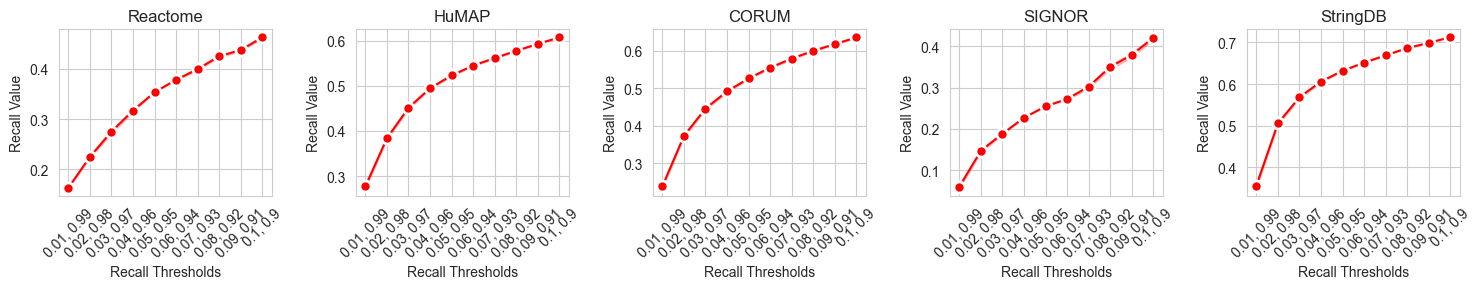

In [3]:
adata = load_replogle("essential", "normalized")
metadata = adata.obs
embeddings_pca = embed_by_pca(adata)
embeddings_aligned = align_by_centering(embeddings_pca, metadata)
map_data = aggregate_by_mean(embeddings_aligned, metadata)
metrics = benchmark(map_data, recall_thr_pairs=recall_threshold_pairs)
plot_recall(metrics)

## scVI Embeddings

In [ ]:
adata = load_replogle("essential", "raw")
metadata = adata.obs
embeddings_scvi = embed_by_scvi(adata)
embeddings_aligned = align_by_centering(embeddings_scvi, metadata)
map_data = aggregate_by_mean(embeddings_aligned, metadata)
metrics = benchmark(map_data, recall_thr_pairs=recall_threshold_pairs)
print(metrics)